In [7]:
import json
import bz2
tweets = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    tweets.append(json.loads(line))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2907: character maps to <undefined>

In [8]:
#opening json file
import pandas as pd
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [9]:
#dropping irrelevant columns
drop_columns = ['latitude','longitude','postal_code','state','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [10]:
df1 = pd.read_csv('review1.csv')

In [11]:
df1=df1.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [12]:
df2 = pd.read_csv('review2.csv')
df2=df2.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [13]:
df3 = pd.read_csv('review3.csv')
df3=df3.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [14]:
df4 = pd.read_csv('review4.csv')
df4=df4.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [15]:
df5 = pd.read_csv('review5.csv')
df5=df5.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [16]:
df6 = pd.read_csv('review6.csv')
df6=df6.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [17]:
df7 = pd.read_csv('review7.csv')
df7=df7.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [18]:
df8 = pd.read_csv('review8.csv')
df8=df8.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [19]:
df9 = pd.read_csv('review9.csv')
df9=df9.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [20]:
df10 = pd.read_csv('review10.csv')
df10=df10.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [21]:
df11 = pd.read_csv('review11.csv')
df11=df11.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [22]:
df12 = pd.read_csv('review12.csv')
df12=df12.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [23]:
df13 = pd.read_csv('review13.csv')
df13=df13.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [24]:
df14 = pd.read_csv('review14.csv')
df14=df14.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [25]:
df15 = pd.read_csv('review15.csv')
df15=df15.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [26]:
df16 = pd.read_csv('review16.csv')
df16=df16.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [27]:
df17 = pd.read_csv('review17.csv')
df17=df17.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [28]:
df18 = pd.read_csv('review18.csv')
df18=df18.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [29]:
#create a dataframe with all the reviews but without the text which is not relevant for the analysis
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10, df11, df12,df13, df14, df15,df16, df17, df18]
result = pd.concat(frames)

In [30]:
#drop all the elements of the list without attributes
for i in range(len(tweets)):
    if None in tweets[i]:
        tweets.pop(i)

In [31]:
#check if there are any attributes in common
import numpy as np
a=1
for i in range(len(tweets)):
    if np.logical_not('ByAppointmentOnly' in tweets[i]):
        a=0
    if a==0:
        break

In [32]:
#after different check to see if there are any attribbutes in common for the restaurants we decide to drop also attribute column
df_b=df_b.drop('attributes',axis=1)


In [33]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_new=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [34]:
def contaM(st):
    a=st.get('Monday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaTu(st):
    a=st.get('Tuesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaW(st):
    a=st.get('Wednesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaT(st):
    a=st.get('Thursday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaF(st):
    a=st.get('Friday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaSa(st):
    a=st.get('Saturday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaS(st):
    a=st.get('Sunday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]

def converti(st):
    hours=0
    if 'Monday' in st:
        hours+=contaM(st)
    if 'Tuesday' in st:
        hours+=contaTu(st)
    if 'Wednesday' in st:
        hours+=contaW(st)
    if 'Thursday' in st:
        hours+=contaT(st)
    if 'Friday' in st:
        hours+=contaF(st)
    if 'Saturday' in st:
        hours+=contaSa(st)
    if 'Sunday' in st:
        hours+=contaS(st)
    return hours

In [35]:
df_new=df_new.reset_index()

In [37]:
df_new['nhours']=float(0)
for i in range(len(df_new)):
    df_new['nhours'][i]=converti(df_new['hours'][i])

<ipython-input-37-f80e3afcfa7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['nhours'][i]=converti(df_new['hours'][i])


In [38]:
df_new[df_new['nhours']%1!=0]

,index,business_id,city,stars,review_count,is_open,categories,hours,nhours
8,26,hcRxdDg7DYryCxCoI8ySQA,Boston,2.5,24,1,"Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'...",106.5
10,33,QciD6FbNklaJvUbLExD4Nw,Burnaby,4.0,76,1,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",71.5
13,41,NRPemqVb4qpWFF0Avq_6OQ,Austin,4.5,395,1,"Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",84.5
20,61,bRsDZ44CD3uhGnRY3NeQhQ,Austin,2.0,46,1,"Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ...",129.5
23,65,z-0oY7VxQMQw3JHvdPejrA,Austin,3.0,21,0,"Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'...",115.5
...,...,...,...,...,...,...,...,...,...
42864,160555,cjyyjjBQXp2HdvlHKT_bCw,Columbus,3.0,81,1,"Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",59.5
42865,160556,87f7kR7nTz8WHnmtLM_S6w,Boston,4.5,737,1,"Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',...",47.5
42866,160561,jYgqSazE0gUyI7qq086Dzw,Portland,3.5,457,1,"Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",43.5
42869,160569,_-nynGfhsMVVWWbAZ6YhTw,Quincy,3.0,30,0,"Restaurants, American (New), Nightlife","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",81.0


In [39]:
df_new=df_new.drop('hours',axis=1)
df_new

,index,business_id,city,stars,review_count,is_open,categories,nhours
0,0,6iYb2HFDywm3zjuRg0shjw,Boulder,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",84.0
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
2,5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,3.5,169,1,"Restaurants, Thai",28.0
3,7,jFYIsSb7r1QeESVUnXPHBw,Columbus,4.5,11,1,"Breakfast & Brunch, Restaurants",12.0
4,12,HPA_qyMEddpAEtFof02ixg,Peabody,4.0,39,1,"Food, Pizza, Restaurants",62.0
...,...,...,...,...,...,...,...,...
42870,160572,r5Uag1JqYjr2nbxQCVqm8A,Orlando,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",90.5
42871,160573,Zl6SUy6x9jqjRu2HbtEO6A,Tigard,2.0,48,0,"American (Traditional), Desserts, American (Ne...",87.0
42872,160574,Q78fYV6B6P6GmX07YVgi4g,Bee Cave,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",97.0
42873,160575,uXdQkuEtvLAzfc3MsO-sTQ,Atlanta,3.0,185,1,"Restaurants, Mexican, Latin American",168.0


In [80]:
np.where(df_new.groupby(by = 'city').count()['index'].values==4898)
df_new.groupby(by = 'city').count().index.values[314]


'Portland'

We will focus on the restaurants of Portland

In [86]:
df_city = df_new[df_new['city']=='Portland']
df_city.sample(10)

,index,business_id,city,stars,review_count,is_open,categories,nhours
22614,85311,bC_q6_kAAgPlZfAYMCJfhg,Portland,3.5,82,1,"Restaurants, Pizza",83.0
20741,78385,2GYLcXyT87eOXnIzvih6OQ,Portland,4.5,17,1,"Japanese, Restaurants",8.0
26379,99592,SxonYBIknYmynmeJjXArjw,Portland,5.0,5,1,"Active Life, Nightlife, Soccer, Restaurants, L...",78.0
17951,67821,f4Z-DQvKouFTOOl4fYEsXw,Portland,2.5,26,0,"Arts & Entertainment, Nightlife, Lounges, Jazz...",92.0
6364,24005,niNyE6cr5txlJvqROwC8qQ,Portland,4.0,27,1,"Restaurants, Vietnamese, Food Trucks, Food",63.0
13329,50329,G_QFLUh-uUat7fCTRBRvNQ,Portland,4.0,251,1,"Restaurants, Coffee & Tea, Food, Breakfast & B...",30.0
21317,80580,oFzdHwfdXOShWTK7_5dA0Q,Portland,3.5,21,1,"Restaurants, Mexican",56.0
11774,44425,Olgy-1l2nmblr6zOEcIN7Q,Portland,5.0,17,1,"Food, Restaurants, Sandwiches, Tapas/Small Pla...",56.0
37610,141130,I8PKeXjLm2VjDIgBqLp_Ew,Portland,4.5,21,1,"Restaurants, Asian Fusion",40.0
40348,151288,wh9Y46OM8WhBRFLYinqHEA,Portland,5.0,6,1,"Food, Food Court, Food Trucks, Restaurants, Me...",49.0


In [90]:
df_closed = df_city[df_city['is_open']==0]

In [131]:
array_attributes = df_city['categories'].values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [132]:
df_city[df_city['categories'].str.contains('Restaurants')] 

,index,business_id,city,stars,review_count,is_open,categories,nhours
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
12,36,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0
16,50,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0
30,93,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0
31,94,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5
...,...,...,...,...,...,...,...,...
42850,160509,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0
42851,160512,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0
42854,160521,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0
42859,160537,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0


In [130]:
#import matplotlib.pyplot as plt
#for el in set_attributes:
    #sb.countplot(data = df_city[df_city['categories'].str.contains(el)], x='is_open')
    #plt.title(el)
    #plt.show()

In [172]:
df_city[df_city['categories'].str.contains('Pet Services')].groupby(by='is_open').count()

,index,business_id,city,stars,review_count,categories,nhours
is_open,,,,,,,
0,2,2,2,2,2,2,2


In [195]:
df_city.categories.str.replace(' ', '')
df_city

,index,business_id,city,stars,review_count,is_open,categories,nhours
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,...",90.0
12,36,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife,Sandwiches,Seafood,Restaurants",114.0
16,50,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian,Vegan,Sandwiches,Soup,American(New)...",47.0
30,93,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"FoodStands,Restaurants,Sandwiches",75.0
31,94,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants,Food,Sandwiches,Breakfast&Brunch,G...",55.5
...,...,...,...,...,...,...,...,...
42850,160509,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian,Restaurants",25.0
42851,160512,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"FoodStands,Food,StreetVendors,Restaurants,Thai",63.0
42854,160521,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs,Breweries,Food,American(Traditional),Bars...",56.0
42859,160537,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion,Men'sClothing,Restaurants,Shopping,Wom...",49.0


In [196]:
df_city[df_city['categories'].str.contains('Restaurant')].count().values[0]

4898

In [202]:
mag = []
for el in list_attributes:
    if df_city[df_city['categories'].str.contains(el)].count().values[0] > 300:
        mag.append(el)

In [238]:
#mag.remove('Restaurants')
mag.remove('Food')

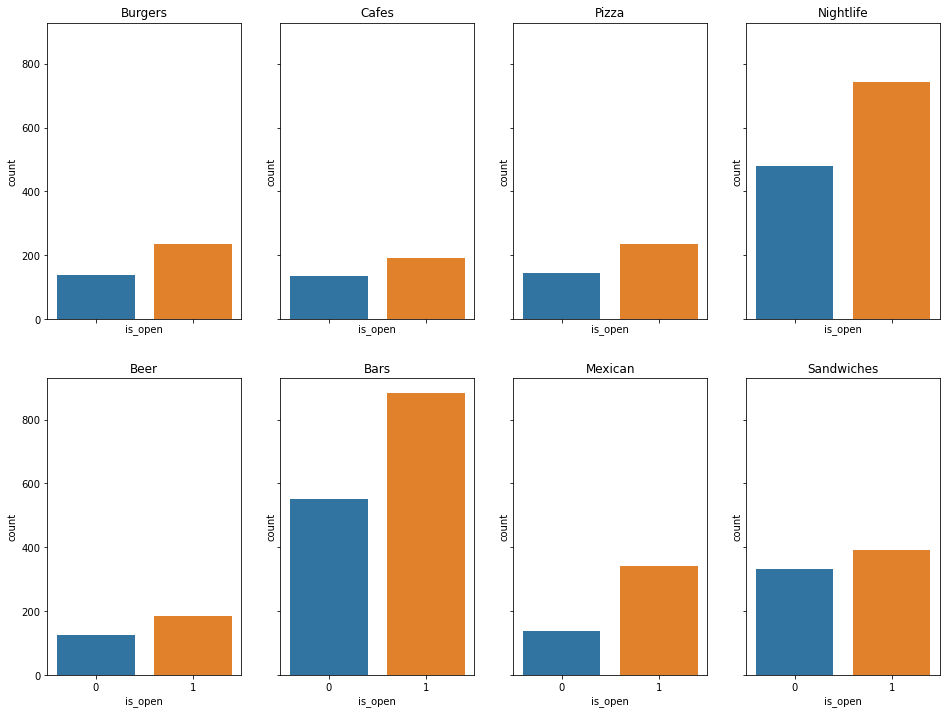

In [239]:
fig, axes = plt.subplots(2,4, sharex=True, sharey= True, figsize = (16,12))
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[i])], x = 'is_open', ax = axes[0, i]).set_title(mag[i])
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[4+i])], x = 'is_open', ax = axes[1, i]).set_title(mag[4+i])